In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from sklearn.impute import KNNImputer

In [2]:
df_val = pd.read_parquet('df_reponse_daily_validate.parquet')
df_val

,stock_id,liq_weight,mktcap_weight,equal_weight,21d_next_raw,10d_next_raw,5d_next_raw,1d_next_raw,21d_next_mktAdj,10d_next_mktAdj,...,MOMENTUM,LEVERAGE,VALUE,EARNYLD,GROWTH,LTREV,STREV,industry_code,st_status,price
time,,,,,,,,,,,,,,,,,,,,,
2018-01-02 10:00:00,1,2.396226e+09,2.378102e+11,1.0,-0.002166,0.020939,-0.059206,-0.012274,-0.001094,0.018502,...,0.426806,0.571510,1.682973,0.525914,-0.003818,0.262610,-0.581015,28,0.0,41.006962
2018-01-02 10:00:00,2,2.024328e+09,3.178840e+11,1.0,0.096972,0.143775,0.093913,0.021719,0.098044,0.141338,...,0.553800,0.656238,0.049565,0.623254,0.642489,-0.808975,-0.825260,11,0.0,40.697322
2018-01-02 10:00:00,4,9.656266e+07,1.861763e+09,1.0,-0.055029,-0.008570,0.035634,0.006315,-0.053957,-0.011007,...,-0.778720,-0.815265,-1.849828,-0.659007,1.095353,0.000000,0.991848,4,0.0,22.170000
2018-01-02 10:00:00,5,1.272400e+08,4.414098e+09,1.0,-0.021583,0.019185,0.052758,0.028777,-0.020511,0.016748,...,-0.986298,-0.407534,-0.966078,-1.043719,1.424853,0.721478,0.590881,16,1.0,4.170000
2018-01-02 10:00:00,8,3.092281e+08,2.466039e+10,1.0,-0.061714,-0.042286,-0.033143,0.003429,-0.060642,-0.044723,...,-0.318160,-0.826986,-1.172774,-0.556188,-0.343901,0.138576,-0.434712,13,0.0,76.202135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-30 10:00:00,688599,8.116526e+08,4.458665e+10,1.0,0.033395,0.002783,-0.072356,0.066790,0.071530,0.038180,...,-0.840888,0.114475,-0.592491,-0.118488,0.725143,0.000000,-3.360791,17,0.0,21.685568
2020-11-30 10:00:00,688600,6.833219e+07,2.749471e+09,1.0,-0.196411,-0.059651,0.005820,-0.005820,-0.158277,-0.024254,...,-3.476765,-0.890170,-0.731900,-0.290051,-0.402108,0.000000,0.585132,16,0.0,20.620000
2020-11-30 10:00:00,688777,4.105879e+08,6.008968e+10,1.0,-0.178317,-0.201210,-0.133350,-0.024773,-0.140183,-0.165813,...,0.000000,-0.168229,-1.339322,-0.274419,0.425546,0.000000,0.000000,13,0.0,122.310000


In [3]:
df = pd.read_parquet('df_reponse_daily_train.parquet')
df = df.reset_index()
df = df[df['time']>'2015-01-01']

In [4]:
df.columns

Index(['time', 'stock_id', 'liq_weight', 'mktcap_weight', 'equal_weight',
       '21d_next_raw', '10d_next_raw', '5d_next_raw', '1d_next_raw',
       '21d_next_mktAdj', '10d_next_mktAdj', '5d_next_mktAdj',
       '1d_next_mktAdj', '21d_next_styAdj', '10d_next_styAdj',
       '5d_next_styAdj', '1d_next_styAdj', 'SIZE', 'SIZENL', 'LIQUIDITY',
       'BETA', 'RESVOL', 'MOMENTUM', 'LEVERAGE', 'VALUE', 'EARNYLD', 'GROWTH',
       'LTREV', 'STREV', 'industry_code', 'st_status', 'price'],
      dtype='object')

In [5]:
#seleting the price column
df_s = df[['time','stock_id','price']]
df_series = df_s.pivot(index='time', columns='stock_id')

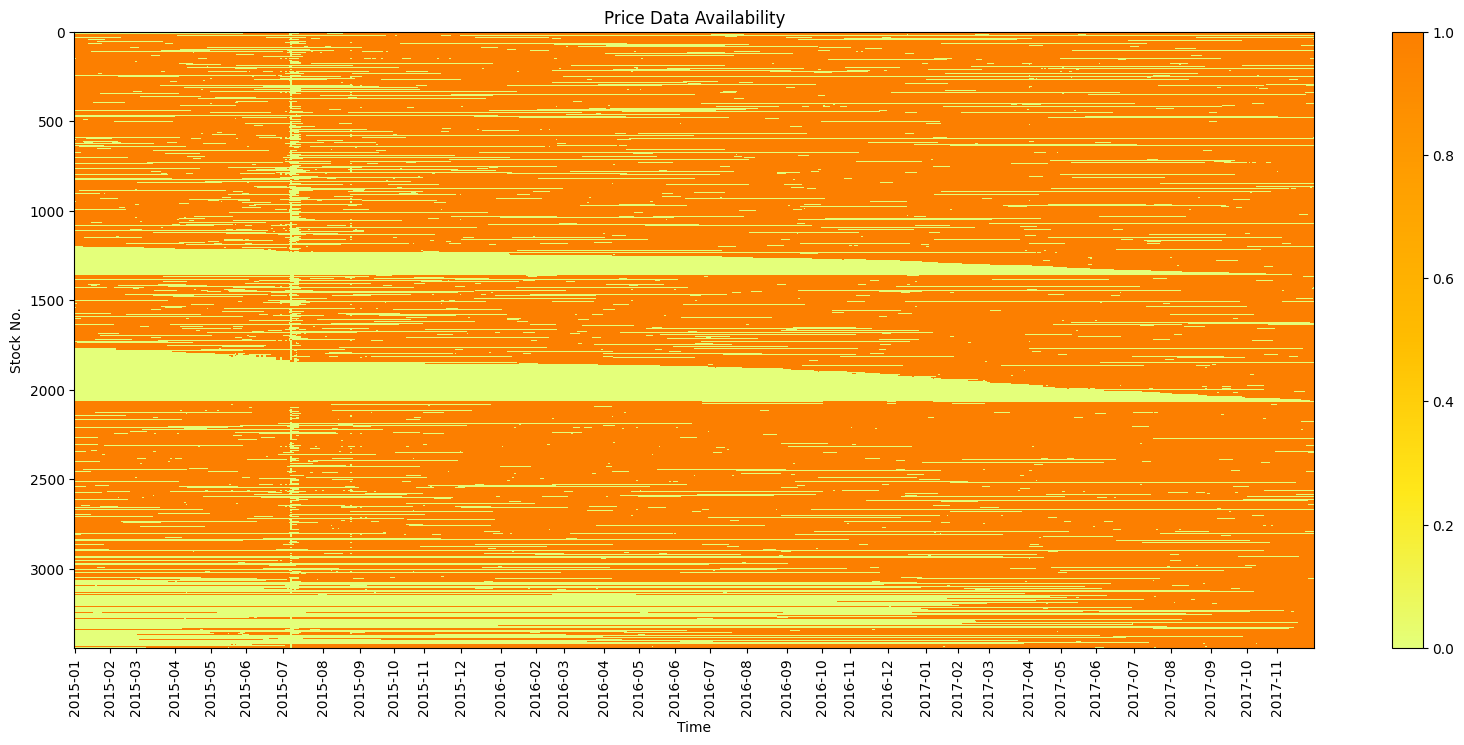

In [6]:
# Description of Nan Values among all data

data_presence = df_series.notna().astype(int)

# 绘制热图来表示数据的存在
plt.figure(figsize=(20, 8))
plt.imshow(data_presence.T, aspect='auto', cmap='Wistia', interpolation='nearest')

# 准备x轴标签
# 获取每个月的第一天
first_of_month = data_presence.index.to_series().resample('MS').min()
# 计算日期在data_presence.index中的位置
first_of_month_positions = [data_presence.index.get_loc(date) for date in first_of_month]
# 准备标签
labels = [date.strftime('%Y-%m') for date in first_of_month]
plt.xticks(ticks=first_of_month_positions, labels=labels, rotation=90)

# 添加color bar
plt.colorbar()

# 添加标题和轴标签
plt.title('Price Data Availability')
plt.xlabel('Time')
plt.ylabel('Stock No.')

plt.show()

In [7]:
#statistic for non-null rows
stockids = ['stock_'+ str(id) for id in df_series.reset_index()['price'].columns]
df_clean = df_series.droplevel('stock_id', axis=1)
df_clean.columns = stockids

df_clean.count().describe()

count    3444.000000
mean      541.142857
std       198.771872
min         1.000000
25%       487.000000
50%       618.000000
75%       692.000000
max       711.000000
dtype: float64

In [8]:
#select only stocks that have no more than n consecutive days of missing data
def filter_consecutive_missing(df,threshold):
    df_nan_count = df.isnull().rolling(window=threshold, min_periods=1).sum()
    df_filtered = df.loc[:, (df_nan_count < threshold).all()]
    
    return df_filtered

#select only stocks that have more than n days data
def filter_total_missing(df,threshold):
    df_filtered = df.loc[:, df.count() > threshold]
    
    return df_filtered

def gen_random_columns(df):
    rand_indices = np.random.choice(len(df.columns), size=4, replace=False)
    rand_cols = df.columns[rand_indices]

    return rand_cols

#generate the plots random time series
def plot_random_time_series(df, rand_cols):
    fig, axs = plt.subplots(2, 2, figsize=(15, 8))

    for i, column_name in enumerate(rand_cols):
        row = i // 2
        col = i % 2
        rand_series = df[column_name].fillna(0.000001)
        axs[row, col].scatter(rand_series.index, rand_series, marker='o', s=10, linestyle='-', label='stock price')
        axs[row, col].scatter(rand_series[rand_series == 0.000001].index, rand_series[rand_series == 0.000001], marker='x', s=10, color='red', label='Missing')  # Highlight values equal to 0.000001 with red
        axs[row, col].set_xlabel('Time')
        axs[row, col].set_ylabel('Price')
        axs[row, col].set_title(f'Random Time Series - {column_name}')
        axs[row, col].legend()
        axs[row, col].grid(True)

    plt.tight_layout()
    plt.show()

def fill_na_knn(df,k):
    imputer = KNNImputer(n_neighbors=k)
    
    return pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [9]:
df_filtered = df_clean
#df_filtered = filter_consecutive_missing(df_clean,30)
df_filtered = filter_total_missing(df_filtered,710/2)
#df_filled = fill_na_knn(df_filtered,2)
len(df_filtered.columns)

2812

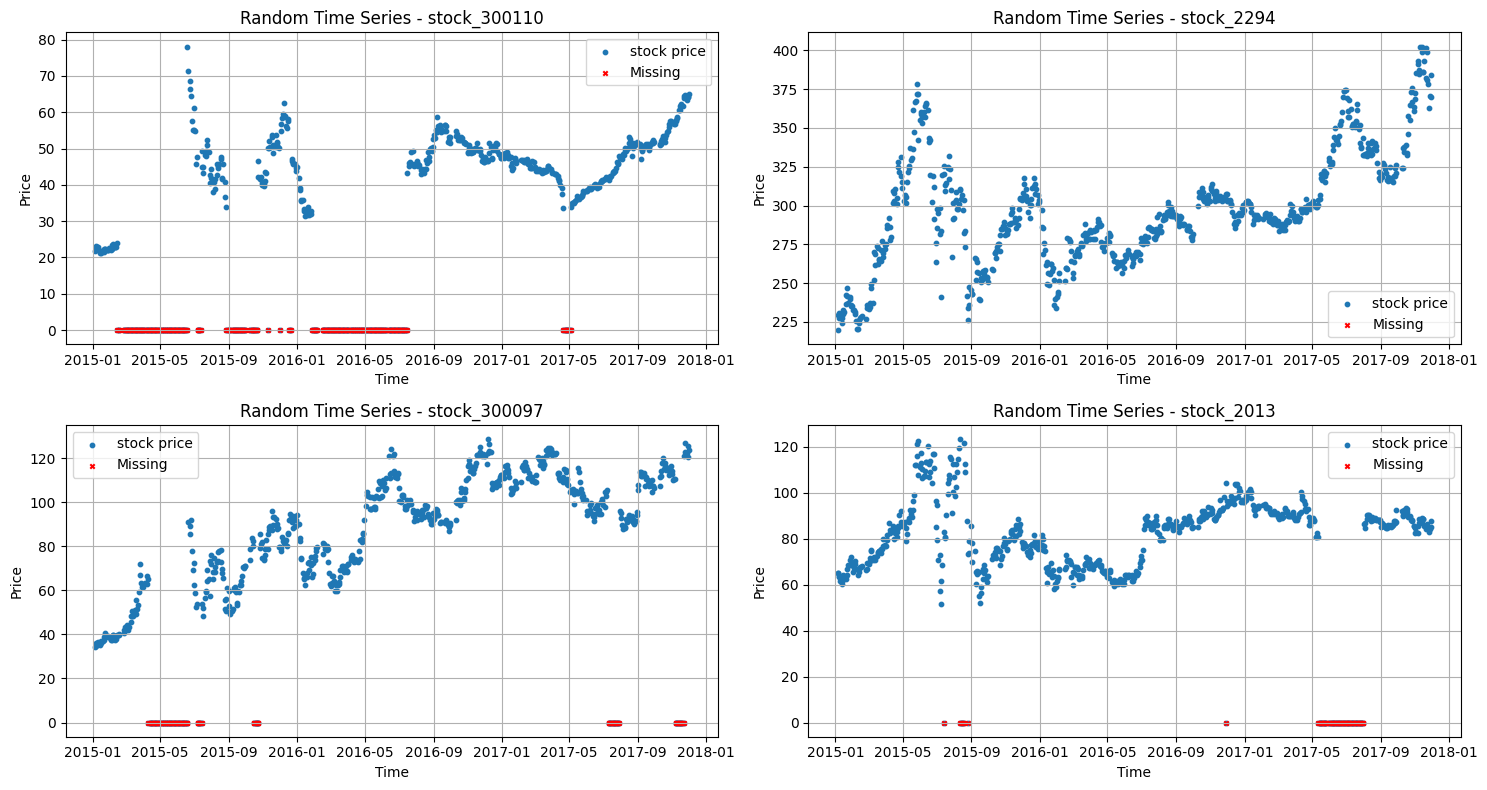

In [10]:
cols = gen_random_columns(df_filtered)
plot_random_time_series(df_filtered,cols)
#plot_random_time_series(df_filled,cols)

In [28]:
df_series = df[['time', 'stock_id','21d_next_raw','SIZE', 'SIZENL', 'LIQUIDITY','BETA',
                'RESVOL', 'MOMENTUM', 'LEVERAGE', 'VALUE','EARNYLD', 'GROWTH','LTREV',
                'STREV', 'industry_code', 'st_status', 'price']].pivot(index='time', columns='stock_id')
df_series.columns = df_series.columns.get_level_values(0) + '_' + df_series.columns.get_level_values(1).astype(str)

In [12]:
def plot_columns(df, column_name_1, column_name_2, column_name_3):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Plot the first column as scatter plot
    axs[0].scatter(df.index, df[column_name_1], marker='o', s=10)
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Price')
    axs[0].set_title('price')
    axs[0].tick_params(axis='x', rotation=45)

    # Plot the second column as scatter plot
    axs[1].scatter(df.index, df[column_name_2], marker='o', s=10)
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Price')
    axs[1].set_title('SIZENL')
    axs[1].tick_params(axis='x', rotation=45)

    # Plot the third column as scatter plot
    axs[2].scatter(df.index, df[column_name_3], marker='o', s=10)
    axs[2].set_xlabel('Time')
    axs[2].set_ylabel('Price')
    axs[2].set_title('LIQUIDITY')
    axs[2].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

In [47]:
df_series[['price_901', 'SIZENL_901', 'LIQUIDITY_901']].dropna()[145:155]

,price_901,SIZENL_901,LIQUIDITY_901
time,,,
2015-08-14 10:00:00,71.045766,0.939351,1.945138
2015-08-17 10:00:00,73.672979,0.943888,1.927915
2015-08-18 10:00:00,71.477468,0.933945,1.884898
2016-02-18 10:00:00,59.204805,0.000000,0.000000
2016-02-19 10:00:00,56.047216,0.820955,0.000000
2016-02-22 10:00:00,57.305318,0.852815,0.000000
2016-02-23 10:00:00,55.849866,0.870918,0.000000
2016-02-24 10:00:00,56.824279,0.876279,0.000000
2016-02-25 10:00:00,54.690439,0.871875,0.000000


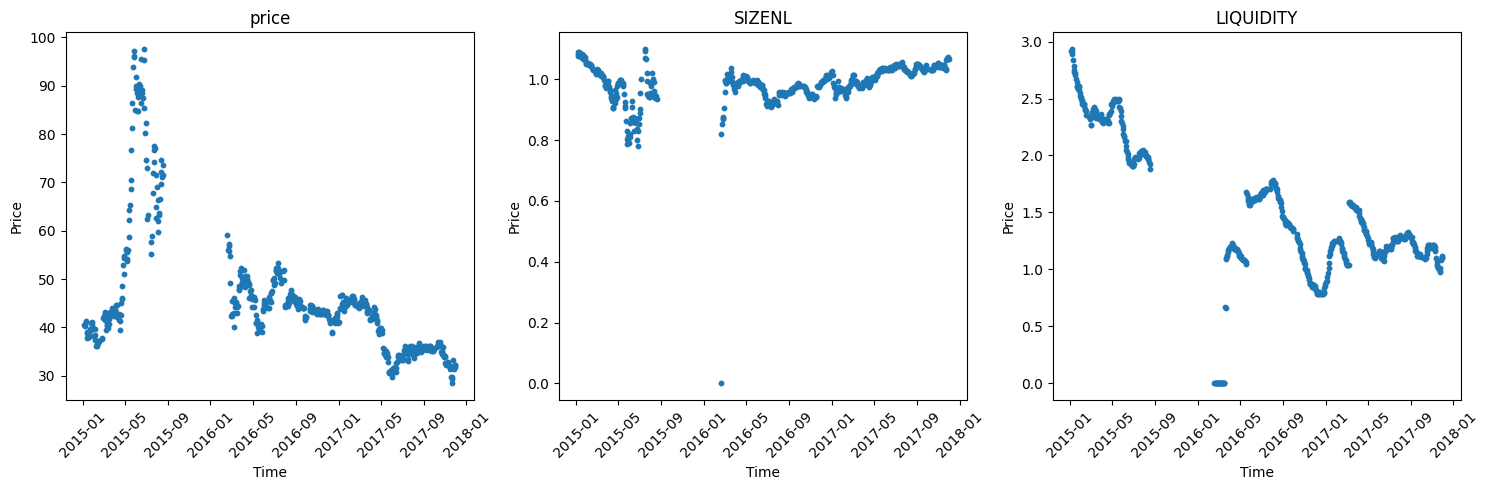

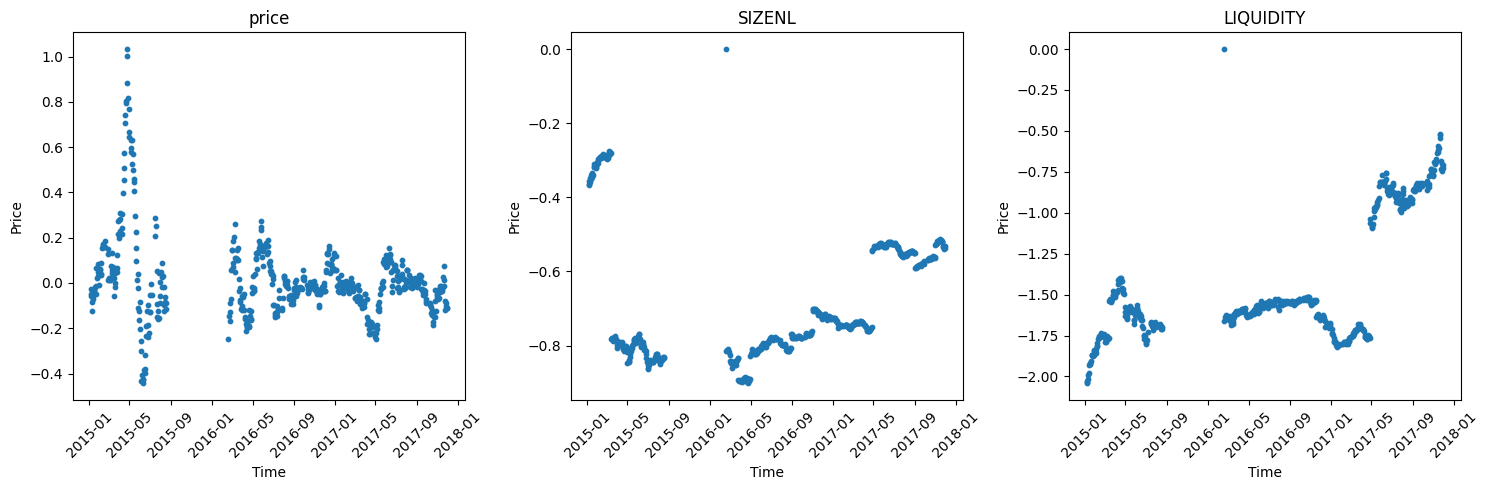

In [13]:
plot_columns(df_series, 'price_901', 'SIZENL_901', 'LIQUIDITY_901')
plot_columns(df_series, '21d_next_raw_901', 'LEVERAGE_901', 'VALUE_901')

In [14]:
no_nan_columns = df_series.columns[df_series.notna().all()]
no_nan_columns.str.split('_').str[-1].nunique()

117

In [15]:
no_nan_columns_int = no_nan_columns.str.split('_').str[-1].unique().astype(int)

In [16]:
df_1stock = df[df['stock_id']==596][['time','21d_next_raw','SIZE', 'SIZENL', 'LIQUIDITY','BETA',
                'RESVOL', 'MOMENTUM', 'LEVERAGE', 'VALUE','EARNYLD', 'GROWTH','LTREV',
                'STREV', 'price']]
df_1stock.to_csv('stock_596_21.csv', index=False)

In [17]:
df_temp = df[df['stock_id'].isin(no_nan_columns_int)][['stock_id','industry_code']]
stocks_industry_30 = df_temp[df_temp['industry_code']==30]['stock_id'].unique()

In [18]:
df_series = df[df['stock_id'].isin(stocks_industry_30)][['time','stock_id','1d_next_raw','SIZE', 'SIZENL', 'LIQUIDITY','BETA',
                'RESVOL', 'MOMENTUM', 'LEVERAGE', 'VALUE','EARNYLD', 'GROWTH','LTREV',
                'STREV', 'price']].pivot(index='time', columns='stock_id')
df_series.columns = df_series.columns.get_level_values(0) + '_' + df_series.columns.get_level_values(1).astype(str)
df_series.reset_index().to_csv('stock_402_nonan_industry30_stocks.csv', index=False)

In [19]:
df_series.reset_index()

,time,1d_next_raw_596,1d_next_raw_729,1d_next_raw_848,1d_next_raw_869,1d_next_raw_895,1d_next_raw_2304,1d_next_raw_2646,1d_next_raw_600059,1d_next_raw_600132,...,price_869,price_895,price_2304,price_2646,price_600059,price_600132,price_600298,price_600519,price_600600,price_603288
0,2015-01-05 10:00:00,0.046008,0.023457,0.041009,0.035794,0.084529,0.093102,0.050800,0.027871,0.014136,...,52.550457,71.425749,208.627070,22.085656,14.471564,17.102977,19.494803,256.978222,43.285541,81.162378
1,2015-01-06 10:00:00,-0.009056,0.015682,0.025974,0.001890,-0.016106,0.005632,-0.012981,0.007592,0.008485,...,54.431458,77.463297,228.050699,23.207599,14.874896,17.344752,20.150878,269.627270,44.332350,80.759587
2,2015-01-07 10:00:00,-0.041775,-0.014252,-0.046414,-0.015629,-0.009062,-0.028117,-0.011338,0.009688,-0.004207,...,54.534325,76.215685,229.335122,22.906337,14.987829,17.491919,20.265431,266.408000,44.280009,83.397868
3,2015-01-08 10:00:00,0.011717,0.018072,0.017699,0.005201,-0.014749,0.007527,-0.003670,0.000000,0.001811,...,53.681997,75.525043,222.886792,22.646628,15.133029,17.418336,20.411226,260.787692,44.070647,83.136054
4,2015-01-09 10:00:00,-0.035281,0.005917,-0.035652,-0.019608,-0.002994,-0.029999,-0.035912,-0.030917,-0.004217,...,53.961208,74.411105,224.564406,22.563521,15.133029,17.449872,20.411226,256.857500,44.562648,83.760380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,2017-11-24 10:00:00,-0.033171,0.006814,0.005376,-0.007712,0.006119,-0.017415,0.001894,-0.006696,0.002726,...,53.337208,105.547062,428.289048,16.913907,14.752854,20.355257,85.863674,988.996123,34.846035,189.906520
707,2017-11-27 10:00:00,0.028086,0.008460,0.009626,0.002303,0.001520,0.024720,0.001890,0.011236,0.021207,...,52.925867,106.192856,420.830302,16.945941,14.654062,20.410751,83.703750,964.002597,33.793711,187.771025
708,2017-11-28 10:00:00,-0.002127,-0.008389,-0.016949,-0.002585,-0.022770,-0.029586,-0.005660,-0.006667,-0.004792,...,53.047746,106.354305,431.233290,16.977975,14.818715,20.843605,85.917006,990.101755,33.837106,194.330045
709,2017-11-29 10:00:00,0.008197,0.005076,0.019397,-0.002016,-0.028738,-0.017824,-0.007590,0.007830,0.014446,...,52.910632,103.932575,418.474908,16.881873,14.719923,20.743716,86.077000,1008.772931,33.457401,192.461487


<Axes: xlabel='time'>

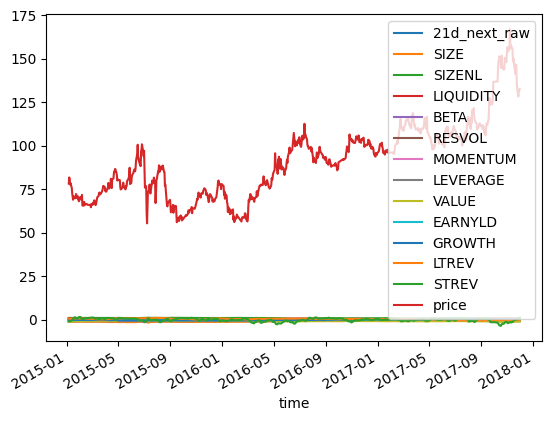

In [20]:
df_1stock.plot(x = 'time')